$\textbf{Interest Rates and Unsupervised Learning}$

We will examine a variety of interest rates and see how the network breaks the rates into various groups.

In [1]:
TAB = readtable('USInterestRate.xlsx');
Names = TAB.Properties.VariableNames;
Names = Names(1,2:end);
IntRate = table2array(TAB(:,2:end));
Stats = [mean(IntRate); median(IntRate); max(IntRate); min(IntRate); std(IntRate)];
x = IntRate;
[rx, cx] = size(x);
date1 = TAB(:,1);
date1 = table2array(date1);
names = TAB(1,:);


In [3]:
who


Your variables are:

IntRate  Names    Stats    TAB      cx       date1    names    rx       x        




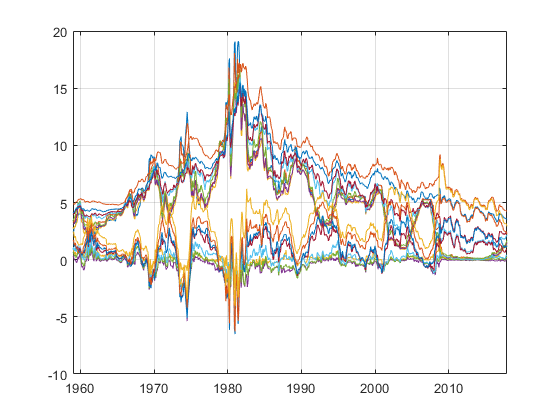

In [3]:
plot(date1, IntRate);  grid;

In [4]:
size(IntRate)


ans =

   709    17




We have monthly interest rates on 17 different assets.

In [6]:
Names


Names =

  1x17 cell array

  Columns 1 through 12

    {'FEDFUNDS'}    {'CP3Mx'}    {'TB3MS'}    {'TB6MS'}    {'GS1'}    {'GS5'}    {'GS10'}    {'AAA'}    {'BAA'}    {'COMPAPFFx'}    {'TB3SMFFM'}    {'TB6SMFFM'}

  Columns 13 through 17

    {'T1YFFM'}    {'T5YFFM'}    {'T10YFFM'}    {'AAAFFM'}    {'BAAFFM'}




We have a variety of maturities and government as well as privat corporate bonds. How do we break them into different groups?
We can use a network to classify them into different groups.

Now let's take the linear principal components.

In [4]:
  [COEFF, SCORE, LATENT, TSQUARED, EXPLAINED] = pca(IntRate);

Using only the first 10 components to compute TSQUARED.
> In pca>localTSquared (line 514)
  In pca (line 360)



In [6]:
EXPLAINED



EXPLAINED =

   85.5702
   12.1014
    1.7834
    0.2692
    0.1351
    0.0703
    0.0407
    0.0210
    0.0075
    0.0011
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000




We see that the first two principal components account for more that 90 percent of the total variance of all of the 17 interest rates.

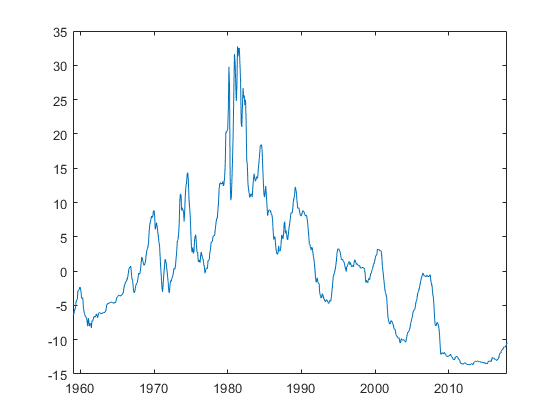

In [9]:
plot(date1, SCORE(:,1));  % We plot the first principal component

In [7]:
net = competlayer(3);
net = train(net,x);
view(net)
y = net(x);
classes1 = vec2ind(y);
view(net);

In [8]:
classes1



classes1 =

     1     1     1     1     1     1     1     1     1     2     2     2     2     2     3     3     3




We see that the first 9 are in one class, the next five are in the second class and the final three are in the third.

In [11]:
net = competlayer(4);
net = train(net,x);
view(net)
y = net(x);
classes2 = vec2ind(y);
view(net);


In [12]:
classes2



classes2 =

     4     4     4     4     4     2     2     2     2     1     1     1     1     1     3     3     3




We see if we use more nerons we get more differentiation
Now lets do nonlinear principal components of the interest rates.



Nonlinear PCA (NLPCA) 
# version: 0.91
# network  type: bottleneck
# training mode: hierarchic
# hierarchic layer: 3 
# hierarchic coefficients: 1    1    1 0.01
# number of components: 3
# network architecture: [17-8-3-8-17]
# weight decay: ON,  coefficient = 0.001
# data scaling, set max std to 0.1 (scal=0.00975)
# initializing weights randomly: set_weights_randomly.m
# network training
# ...

  # sorting components at iteration 1 - switching PC 1 with PC 2 - done
  # sorting components at iteration 33 - done
  # sorting components at iteration 35 - done
  # sorting components at iteration 37 - switching PC 2 with PC 3 - done
  # sorting components at iteration 40 - done
  # sorting components at iteration 42 - done
  # sorting components at iteration 43 - done
  # sorting components at iteration 44 - switching PC 2 with PC 3 - done
  # sorting components at iteration 48 - done
  # sorting components at iteration 54 - switching PC 2 with PC 3 - done
  # sorting components at iterati

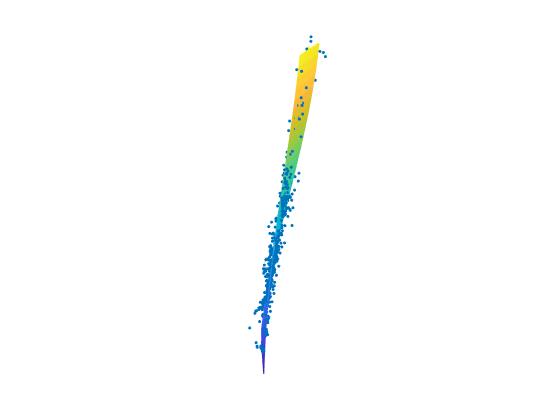

In [13]:
[pc, net3] = nlpca(x');


In [14]:
who


Your variables are:

IntRate   Stats     ans       classes2  date1     net       net3      rx        x         y1        
Names     TAB       classes1  cx        names     net1      pc        tr1       y         




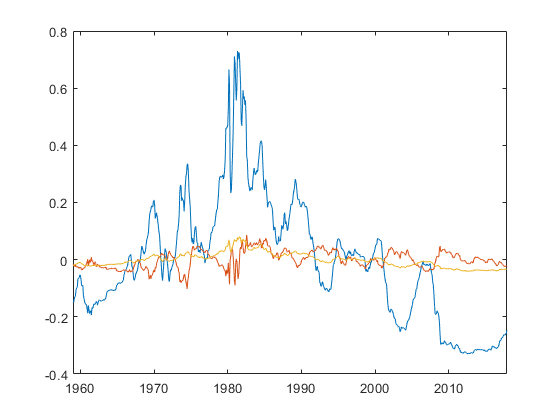

In [16]:
PC = pc';  plot(date1, PC);

We see that the first nonlinear Principal Component explains most of the variation in the data.